In [34]:
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import linear_model
import statsmodels.formula.api as sm
import numpy as np
import math

from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
#%matplotlib inline
%matplotlib notebook

In [2]:
# Read in data
raw_df = pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',
                     header=0,
                     low_memory=False)

In [3]:
ivies = [217156, 166027, 130794, 190415, 186131, 182670, 190150, 186131]
attributes = ["UNITID", "INSTNM", 
              "ADM_RATE",
              "SAT_AVG", 
              "UGDS", 
              # Diversity
              "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN",
              # Economics
              "COSTT4_A", "PCTPELL", 
              # Fac Salary
              "AVGFACSAL",
              #Completion rate
             "C150_4",
              # Share of independent students
              "DEP_STAT_PCT_IND",
              # Median debt for completed students
              "GRAD_DEBT_MDN" #,
              # Median salary 10 years after grad
              #"MD_EARN_WNE_P10"
             ]

df = raw_df[attributes]

df = df.convert_objects(convert_numeric=True).round(2).dropna()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [4]:
data = df[["ADM_RATE",
              "SAT_AVG", 
              "UGDS", 
              # Diversity
              "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN",
              # Economics
              "COSTT4_A", "PCTPELL", 
              # Fac Salary
              "AVGFACSAL",
              #Completion rate
             "C150_4",
              # Share of independent students
              "DEP_STAT_PCT_IND",
              # Median debt for completed students
              "GRAD_DEBT_MDN" #,
              # Median salary 10 years after grad
              #"MD_EARN_WNE_P10"
             ]]
labelled = df[["INSTNM", "UNITID"]]
print(len(data))

1206


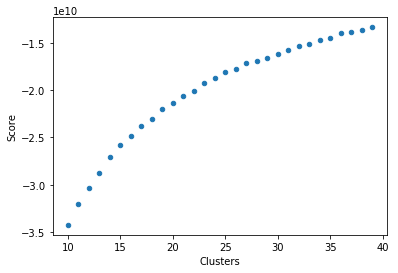

In [5]:
# Creating elbowplot over attrbutes
values = []
for i in range(10, 40):
    kmeans = KMeans(n_clusters=i, random_state=0)

    kmeans.fit(data)
    
    values.append([i, kmeans.score(data)])


values = np.array(values)
#values = np.reshape(values, (20,2))

v = pd.DataFrame({'Clusters' : values[:,0], 'Score' : values[:,1]})

v.plot.scatter(x='Clusters', y='Score')

In [6]:
# Kmeans on our attribute
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

kmeans.fit(data)

clusters = [[] for i in range(0,num_clusters)]
for i,k in enumerate(kmeans.labels_):
    clusters[k].append(labelled.values[i][0])

In [7]:
## PRINT IVY CLUSTERS
clusters = [[] for i in range(0,num_clusters)]
for i,k in enumerate(kmeans.labels_):
    if labelled.values[i][1] in ivies:
        print(labelled.values[i][0], k)
    
    #clusters[k].append(labelled.values[i][0])
## TO PRINT IVY CLUSTERS
# with np.printoptions(precision=3, suppress=True):
#     print(kmeans.cluster_centers_[4])
#     print(kmeans.cluster_centers_[22])
#     print(kmeans.cluster_centers_[25])
# for r in clusters:
#     print(str(r) + '\n')
    

Yale University 4
Harvard University 4
Dartmouth College 22
Columbia University in the City of New York 25
Cornell University 4
Brown University 22
[    0.086  1479.875  8265.875     0.434     0.068     0.116     0.19
 66572.25      0.133 17429.875     0.951     0.148 12234.562]
[    0.221  1410.474  4908.421     0.507     0.058     0.108     0.145
 64908.895     0.149 13140.579     0.908     0.066 16063.026]
[    0.345  1348.8   14121.7       0.488     0.055     0.108     0.133
 65431.3       0.18  13424.6       0.855     0.138 24448.5  ]


In [12]:
### PCA on our "selected" columns
pca = PCA(n_components=3)

X = pca.fit_transform(data)

num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

kmeans.fit(X)

clusters = [[] for i in range(0,num_clusters)]
for i,k in enumerate(kmeans.labels_):
    clusters[k].append(labelled.values[i][0])
    
for r in clusters:
    print(str(r) + '\n')
    
for i,k in enumerate(kmeans.labels_):
    if labelled.values[i][1] in ivies:
        print(labelled.values[i][0], k)

centers = kmeans.cluster_centers_

['Harding University', 'Post University', 'Flagler College-St Augustine', 'Point University', 'Emmanuel College', 'Truett McConnell University', 'Blackburn College', 'Eureka College', 'Brescia University', 'Kentucky Christian University', 'Maine Maritime Academy', 'Washington Adventist University', 'Massachusetts College of Art and Design', 'Madonna University', 'Rochester College', 'Michigan Technological University', 'Oak Hills Christian College', 'Mississippi College', 'Lindenwood University', 'Bryan College of Health Sciences', 'York College', 'Keene State College', 'College of Mount Saint Vincent', 'St Francis College', 'Belmont Abbey College', 'University of Mount Olive', 'Mid-Atlantic Christian University', 'University of Jamestown', 'Trinity Bible College and Graduate School', 'Cincinnati Christian University', 'Lourdes University', 'Bryn Athyn College of the New Church', 'Lincoln University', 'Pennsylvania State University-Penn State Erie-Behrend College', 'Pennsylvania State 

In [73]:
ivy_df = raw_df[raw_df["UNITID"].isin([str(i) for i in ivies])]

#ivy_df = ivy_df[ivy_df.columns[~ivy_df.isna().all()]]
col = []
ivy_vals = ivy_df.values
for i in range(0, len(raw_df.columns)):
    valid = True
    for j in range(0, len(ivy_df)):
        if pd.isnull(ivy_vals[j][i]):
            valid = False
    if valid:
        col.append(ivy_df.columns[i])

df1 = raw_df[col]


df1 = df1.convert_objects(convert_numeric=True).round(2).dropna()

print(len(df1))
print(len(df1.columns))
print(df1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


8
588
      UNITID    OPEID  OPEID6                                       INSTNM  \
1010  146719   171000    1710                    Loyola University Chicago   
1762  173045   233400    2334                          Augsburg University   
2260  190150   270700    2707  Columbia University in the City of New York   
2516  198136   291300    2913                          Campbell University   
3027  212054   325600    3256                            Drexel University   
3502  225627   357800    3578             University of the Incarnate Word   
3650  230852   368400    3684                            Champlain College   
3701  232557  2053000   20530                           Liberty University   

              CITY STABBR      ZIP  \
1010       Chicago     IL  60660.0   
1762   Minneapolis     MN  55454.0   
2260      New York     NY  10027.0   
2516   Buies Creek     NC  27506.0   
3027  Philadelphia     PA  19104.0   
3502   San Antonio     TX  78209.0   
3650    Burlington     VT

In [76]:
### PCA on all columns
from sklearn import preprocessing
mbs = preprocessing.MaxAbsScaler()
X_all = mbs.fit_transform(raw_df.select_dtypes(include=['int','float64']))
pca = PCA(n_components=30)

X_all = pca.fit_transform(X_all)
labels = raw_df[["INSTNM"]]

num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

kmeans.fit(X_all)

clusters = [[] for i in range(0,num_clusters)]
for i,k in enumerate(kmeans.labels_):
    clusters[k].append(labels.values[i][0])
    
for r in clusters:
    print(str(r) + '\n')
    
for i,k in enumerate(kmeans.labels_):
    if labelled.values[i][1] in ivies:
        print(labelled.values[i][0], k)

centers = kmeans.cluster_centers_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:923: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').